In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key


# Import the datetime module from the datetime library.
from datetime import datetime


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

pevek ru
patrocinio br
qaanaaq gl
assiniboia ca
qaanaaq gl
krechevitsy ru
albany au
butaritari ki
pevek ru
busselton au
rikitea pf
saint-joseph re
abong mbang cm
rikitea pf
kavaratti in
illoqqortoormiut gl
attawapiskat ca
cardston ca
alvorada br
punta arenas cl
mount isa au
mataura pf
punta arenas cl
liverpool ca
carnarvon au
poum nc
new norfolk au
punta arenas cl
tuktoyaktuk ca
coahuayana mx
arlit ne
ardistan ir
new norfolk au
bathsheba bb
kegayli uz
walvis bay na
redlands us
busselton au
biak id
garden city us
ca mau vn
hermanus za
qaanaaq gl
new norfolk au
san patricio mx
arraial do cabo br
diffa ne
busselton au
hithadhoo mv
mahebourg mu
pangai to
punta arenas cl
tsihombe mg
saskylakh ru
albany au
faanui pf
upernavik gl
poum nc
bellavista pe
sola vu
vaini to
taolanaro mg
guerrero negro mx
rikitea pf
castro cl
chokurdakh ru
saint-philippe re
ushuaia ar
qaanaaq gl
hobart au
yellowknife ca
kirakira sb
zdvinsk ru
iqaluit ca
qaanaaq gl
syracuse it
hobart au
gambela et
karakendzha tj
barr

butaritari ki
busselton au
jamestown sh
xiaoweizhai cn
ushuaia ar
bousso td
mataura pf
nguiu au
hermanus za
lavrentiya ru
katsuura jp
atuona pf
tandalti sd
norman wells ca
bredasdorp za
kavieng pg
yangambi cd
ponta do sol cv
ancud cl
port-gentil ga
kavieng pg
butaritari ki
arman ru
trowbridge gb
hermanus za
nelson gb
east london za
saint anthony ca
lebu cl
cervo es
codrington ag
hobart au
jamestown sh
raudeberg no
hithadhoo mv
cape town za
mar del plata ar
busselton au
monster nl
busselton au
alekseyevsk ru
ushuaia ar
hilo us
vaini to
pandan ph
itarema br
anito ph
rikitea pf
kapaa us
esperance au
chapais ca
rio brilhante br
itarema br
souillac mu
husavik is
longyearbyen sj
saskylakh ru
jamestown sh
albany au
yulara au
khatanga ru
sfantu gheorghe ro
labuan my
albany au
katsuura jp
punta arenas cl
ancud cl
saleaula ws
butaritari ki
rikitea pf
yellowknife ca
balimo pg
mar del plata ar
yulara au
paciran id
albany au
tautira pf
barrow us
lagoa pt
san cristobal ec
rikitea pf
tanggu cn
davend

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [83]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | patrocinio
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | assiniboia
Processing Record 5 of Set 1 | krechevitsy
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | saint-joseph
Processing Record 11 of Set 1 | abong mbang
Processing Record 12 of Set 1 | kavaratti
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | cardston
Processing Record 16 of Set 1 | alvorada
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | liverpool
Processing Record 21 of Set 1 | carnarvon
Pro

Processing Record 39 of Set 4 | ambulu
Processing Record 40 of Set 4 | san jose
Processing Record 41 of Set 4 | uinskoye
Processing Record 42 of Set 4 | kapaa
Processing Record 43 of Set 4 | belle fourche
Processing Record 44 of Set 4 | samarai
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | hofn
Processing Record 47 of Set 4 | nuuk
Processing Record 48 of Set 4 | hualmay
Processing Record 49 of Set 4 | mahibadhoo
Processing Record 50 of Set 4 | palmer
Processing Record 1 of Set 5 | ventspils
Processing Record 2 of Set 5 | shaoyang
Processing Record 3 of Set 5 | aulla
Processing Record 4 of Set 5 | rawson
Processing Record 5 of Set 5 | pochutla
Processing Record 6 of Set 5 | matagami
Processing Record 7 of Set 5 | gazanjyk
Processing Record 8 of Set 5 | westport
Processing Record 9 of Set 5 | airai
Processing Record 10 of Set 5 | tshikapa
Processing Record 11 of Set 5 | iquitos
Processing Record 12 of Set 5 | manggar
Processing Record 13 of Set 5 | dubbo
P

Processing Record 30 of Set 8 | nanortalik
Processing Record 31 of Set 8 | ixcatepec
Processing Record 32 of Set 8 | bairiki
Processing Record 33 of Set 8 | winfield
Processing Record 34 of Set 8 | haines junction
Processing Record 35 of Set 8 | halalo
City not found. Skipping...
Processing Record 36 of Set 8 | alofi
Processing Record 37 of Set 8 | khonuu
City not found. Skipping...
Processing Record 38 of Set 8 | puerto el triunfo
Processing Record 39 of Set 8 | kargat
Processing Record 40 of Set 8 | zhigalovo
Processing Record 41 of Set 8 | karaman
Processing Record 42 of Set 8 | bardiyah
Processing Record 43 of Set 8 | okakarara
Processing Record 44 of Set 8 | mount gambier
Processing Record 45 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 8 | husavik
Processing Record 47 of Set 8 | kaeo
Processing Record 48 of Set 8 | muskegon
Processing Record 49 of Set 8 | cascais
Processing Record 50 of Set 8 | acajutla
Processing Record 1 of Set 9 | clyde river


Processing Record 13 of Set 12 | sept-iles
Processing Record 14 of Set 12 | yanan
City not found. Skipping...
Processing Record 15 of Set 12 | santa maria
Processing Record 16 of Set 12 | gunjur
Processing Record 17 of Set 12 | fonte boa
Processing Record 18 of Set 12 | parana
Processing Record 19 of Set 12 | wanaka
Processing Record 20 of Set 12 | launceston
Processing Record 21 of Set 12 | namibe
Processing Record 22 of Set 12 | paamiut
Processing Record 23 of Set 12 | sorgun
Processing Record 24 of Set 12 | kant
Processing Record 25 of Set 12 | tecoanapa
Processing Record 26 of Set 12 | casablanca
Processing Record 27 of Set 12 | parakou
Processing Record 28 of Set 12 | nelidovo
Processing Record 29 of Set 12 | katrineholm
Processing Record 30 of Set 12 | dolores
Processing Record 31 of Set 12 | jijiga
Processing Record 32 of Set 12 | matiguas
Processing Record 33 of Set 12 | neiafu
Processing Record 34 of Set 12 | jutai
Processing Record 35 of Set 12 | barreiras
Processing Record 3

In [19]:
len(city_data)

560

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,-5.22,88,47,5.32,RU,2021-02-06 22:05:12
1,Patrocinio,-18.9439,-46.9925,70.00,100,95,3.53,BR,2021-02-06 22:01:24
2,Qaanaaq,77.4840,-69.3632,10.65,87,99,7.63,GL,2021-02-06 22:05:12
3,Assiniboia,49.6334,-105.9845,-14.80,53,95,5.75,CA,2021-02-06 22:05:12
4,Krechevitsy,58.6170,31.4010,3.38,94,96,7.18,RU,2021-02-06 22:05:12
5,Albany,42.6001,-73.9662,35.60,40,20,13.80,US,2021-02-06 22:05:12
6,Butaritari,3.0707,172.7902,80.74,81,100,20.47,KI,2021-02-06 22:05:12
7,Busselton,-33.6500,115.3333,57.99,97,100,4.00,AU,2021-02-06 22:05:12
8,Rikitea,-23.1203,-134.9692,78.19,70,100,9.95,PF,2021-02-06 22:05:13
9,Saint-Joseph,-21.3667,55.6167,78.80,78,0,5.75,RE,2021-02-06 22:05:13


In [22]:
#Rearrange columns for an easier read
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2021-02-06 22:05:12,69.7008,170.3133,-5.22,88,47,5.32
1,Patrocinio,BR,2021-02-06 22:01:24,-18.9439,-46.9925,70.00,100,95,3.53
2,Qaanaaq,GL,2021-02-06 22:05:12,77.4840,-69.3632,10.65,87,99,7.63
3,Assiniboia,CA,2021-02-06 22:05:12,49.6334,-105.9845,-14.80,53,95,5.75
4,Krechevitsy,RU,2021-02-06 22:05:12,58.6170,31.4010,3.38,94,96,7.18


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

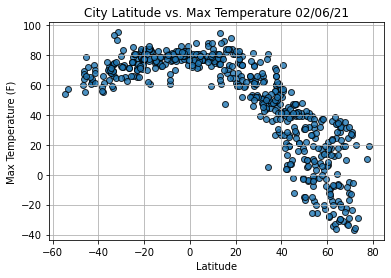

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

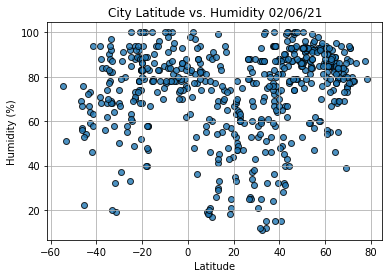

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

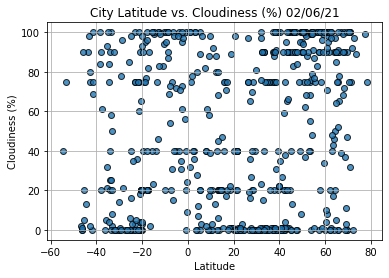

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

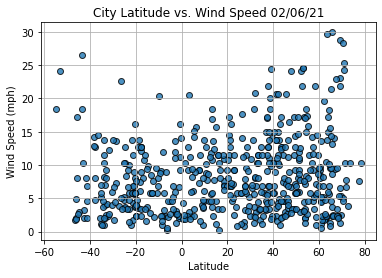

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [70]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [71]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

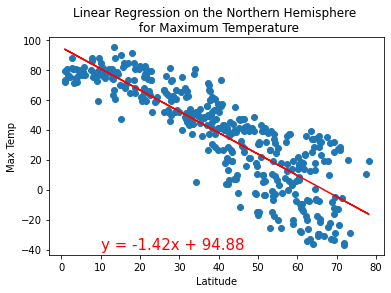

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10, -40))

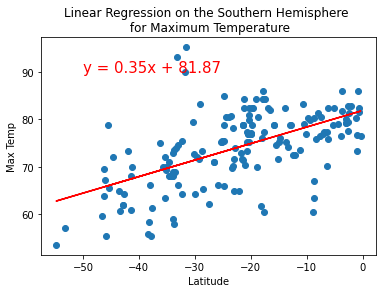

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

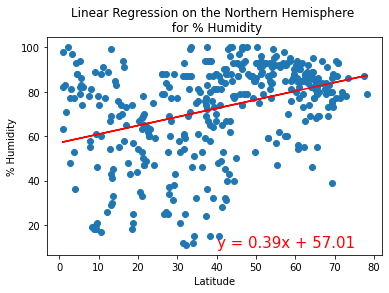

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

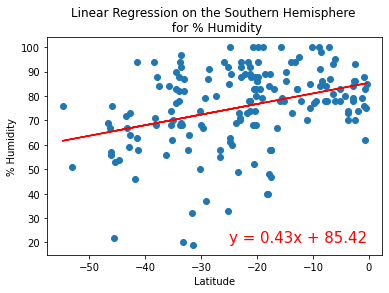

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,20))

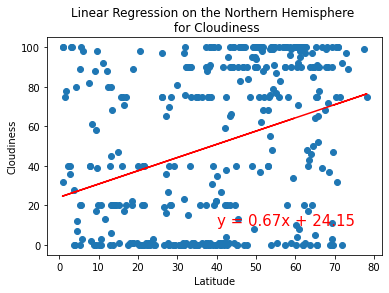

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(40,10))

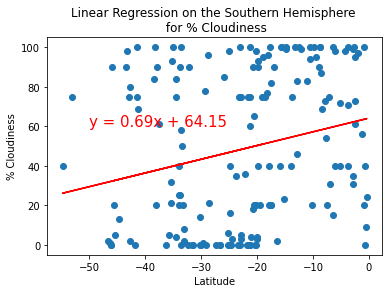

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

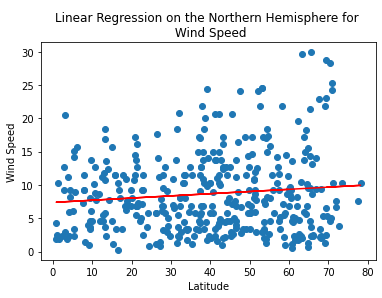

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n Wind Speed', 'Wind Speed',(40,35))

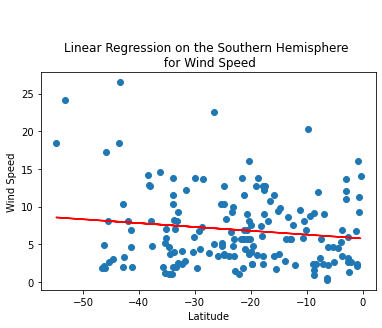

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))